In [2]:
import math
import json
from pprint import pprint
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt
import os
import math


/home/leem/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/leem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-1.0 0.16999999999999998 [-0.37, -1.0, -1.0, 0.16999999999999998, -1.0, -1.0, -1.0, -1.0, -0.19999999999999996, -1.0, -1.0, -0.27, -1.0, 0.04999999999999999, -1.0, -0.08999999999999997, -1.0, 0.12, -1.0, -1.0]
527


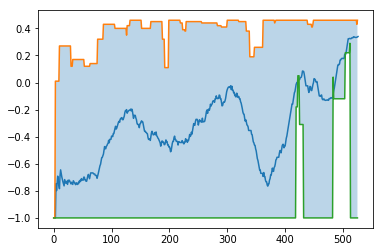

In [44]:
def plotAverageErrorScores(file_list):

    lineNames = []
    colors = ["red","purple","brown"]
    for j,fileBunch in enumerate(file_list):
        allScores = []
        for file in fileBunch:
            alphaTrue,gammaTrue = findAlphaGamme(file)
            my_data = genfromtxt(file, delimiter=',')
            scores = [x[0] for x in my_data if math.isnan(x[0]) != True]
            
            scores = scores[-25:]
            
            averageScores = []
            for i,score in enumerate(scores):
                averageScores.append((sum(scores[:(i+1)])/(i+1)))
            allScores.append(averageScores)
            avScore = []
            minScore = []
            maxScore = []
            x = []

        for i in range(np.shape(allScores)[1]):
            avScore.append((allScores[0][i]+allScores[1][i]+allScores[2][i])/3) 
            minScore.append(min(allScores[0][i],allScores[1][i],allScores[2][i]))
            maxScore.append(max(allScores[0][i],allScores[1][i],allScores[2][i]))
            x.append(i+1)
        
        lineName = ("Alpha:%s,Gamma:%s"%(alphaTrue,gammaTrue))
        lineNames.append(lineName)
        plt.plot(x,avScore,color = colors[j])
        plt.fill_between(x,minScore,maxScore, alpha=0.3,color = colors[j])
        
        print("Final Average Score for Alpha:%s;Gamma:%s: %0.2f"%(alphaTrue,gammaTrue,avScore[-1]))
        
        
    plt.legend(lineNames,loc='lower right')
    plt.axhline(0,color='grey',linestyle='--')
    #plt.xlim([150,205])
    plt.ylim([-6.5,0.4])
    
    plt.title("Average Rewards for Testing - Find The Goal");
    #plt.title("Average Rewards for Training - Find The Goal");
    plt.ylabel("Average Rewards");
    #plt.xlabel("Training Steps");
    plt.xlabel("Testing Episodes");
    
def plotAverageWithErrors(file):
    my_data = genfromtxt(file, delimiter=',')
    scores = [x[0]/100000 for x in my_data]
    #Correct miscoring
    scores = [x + 0.5 if x> -1.0 else x for x in scores]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    averagingWindow = 50
    averageScores = [np.mean(scores[:x]) for x in range(averagingWindow)]

    for i in range(averagingWindow,len(scores)):
        avg = np.mean(scores[i-averagingWindow:i])
        averageScores.append(avg)
        
    errorWindow = 20
    upperScores = [max(scores[:x]) for x in range(1,errorWindow)]
    lowerScores = [min(scores[:x]) for x in range(1,errorWindow)]

    for j in range(errorWindow,len(scores)):
        upper = max(scores[j-errorWindow:j])
        lower = min(scores[j-errorWindow:j])
        if j == 50:
            print(lower,upper,scores[j-errorWindow:j])
        upperScores.append(upper)
        lowerScores.append(lower)
    #print(averageScores)
    #print(upperScores)
    #print(lowerScores)
    plt.plot(averageScores)
    plt.plot(upperScores)
    plt.plot(lowerScores)
    plt.fill_between(range(len(upperScores)),upperScores,lowerScores, alpha=0.3)
    print(len(scores)) 
    
plotAverageWithErrors("./experimentaldqn/totalresults.csv")

    
        
        
    
    
    

In [2]:
def plotScores(file):
    
    #alphaTrue,gammaTrue = findAlphaGamme(file)
        
    my_data = genfromtxt(file, delimiter=',')
    scores = [x[0] for x in my_data]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    #scores = scores[-50:]
    
    #print("\nAlpha:%s;Gamma:%s"%(alphaTrue,gammaTrue))
    print("Games: " , str(len(scores)), " - Average Time: ", str(sum(time)/len(scores)))
    print("Average reward for the last 20 games: %.2f with an epsilon of %.2f" % (sum(scores[-20:])/min(len(scores),20), epsilon[-1]))
    plt.plot(scores);

    lowCount = 0
    highCount = 0
    for score in scores:
        if score < -2.4:
            lowCount += 1
        if score > 0:
            highCount += 1
    print("Scores that have reached over 0: %s out of %s"%(highCount,len(scores)))
    print("Scores that have reached -2.5: %s out of %s"%(lowCount,len(scores)))
    
    averageScores = []
    for i,score in enumerate(scores):
        averageScores.append((sum(scores[:(i+1)])/(i+1)))

    
    plt.plot(averageScores);
    #plt.title("Scores for %s games - total average score is %.3f"%(len(averageScores),averageScores[-1]));
    plt.xlabel("Game");
    plt.ylabel("Score");
    plt.axhline(0,color='grey',linestyle='--')
    plt.legend(["Score","Average Score"])
    
    

In [19]:
def plotdqnScores(file):
    
    #alphaTrue,gammaTrue = findAlphaGamme(file)
        
    my_data = genfromtxt(file, delimiter=',')
    scores = [x[0]/100000 for x in my_data]
    #Correct miscoring
    scores = [x + 0.5 if x> -1.0 else x for x in scores]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    #scores = scores[-50:]
    print(f"Max {max(scores)}")
    print(f"Min {min(scores)}")

    #print("\nAlpha:%s;Gamma:%s"%(alphaTrue,gammaTrue))
    print("Games: " , str(len(scores)), " - Average Time: ", str(sum(time)/len(scores)))
    print("Average reward for the last 20 games: %.2f with an epsilon of %.2f" % (sum(scores[-20:])/min(len(scores),20), epsilon[-1]))
    reducedScores = scores[0::5]
    plt.plot(range(3*len(scores)

    lowCount = 0
    highCount = 0
    for score in scores:
        if score < -2.4:
            lowCount += 1
        if score > 0:
            highCount += 1
    print("Scores that have reached over 0: %s out of %s"%(highCount,len(scores)))
    print("Scores that have reached -2.5: %s out of %s"%(lowCount,len(scores)))
    
    averagingWindow = 50
    averageScores = [np.mean(scores[:x]) for x in range(averagingWindow)]
    for i in range(averagingWindow,len(scores)):
        avg = np.mean(scores[i-averagingWindow:i])
        averageScores.append(avg)

    
    plt.plot(averageScores);
    #plt.title("Scores for %s games - total average score is %.3f"%(len(averageScores),averageScores[-1]));
    plt.xlabel("Game");
    plt.ylabel("Score");
    plt.axhline(0,color='grey',linestyle='--')
    

Max 0.46
Min -1.0
Games:  527  - Average Time:  635.5825426944972
Average reward for the last 20 games: 0.31 with an epsilon of 0.00
Scores that have reached over 0: 244 out of 527
Scores that have reached -2.5: 0 out of 527


/home/leem/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/leem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


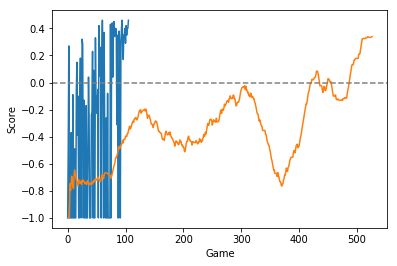

In [20]:
#plotScores("Results_Alpha_0_8_Gamma_1_Decay_0_98.csv")
plotdqnScores("./experimentaldqn/totalresults.csv")

Max 0.0799999999999998
Min -1.0000000000000007
Games:  934  - Average Time:  950.0460385438972
Average reward for the last 20 games: -1.00 with an epsilon of 0.00
Scores that have reached over 0: 1 out of 934
Scores that have reached -2.5: 0 out of 934


/home/leem/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/leem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


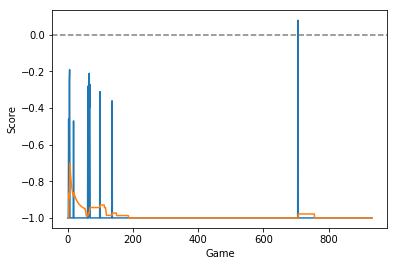

In [47]:
def plotsimpledqnScores(file):
    
    #alphaTrue,gammaTrue = findAlphaGamme(file)
        
    my_data = genfromtxt(file, delimiter=',')
    scores = [x[0] for x in my_data]
    #Correct miscoring
    scores = [x + 0.5 if x> -1.0 else x for x in scores]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    #scores = scores[-50:]
    print(f"Max {max(scores)}")
    print(f"Min {min(scores)}")

    #print("\nAlpha:%s;Gamma:%s"%(alphaTrue,gammaTrue))
    print("Games: " , str(len(scores)), " - Average Time: ", str(sum(time)/len(scores)))
    print("Average reward for the last 20 games: %.2f with an epsilon of %.2f" % (sum(scores[-20:])/min(len(scores),20), epsilon[-1]))
    plt.plot(scores);

    lowCount = 0
    highCount = 0
    for score in scores:
        if score < -2.4:
            lowCount += 1
        if score > 0:
            highCount += 1
    print("Scores that have reached over 0: %s out of %s"%(highCount,len(scores)))
    print("Scores that have reached -2.5: %s out of %s"%(lowCount,len(scores)))
    
    averagingWindow = 50
    averageScores = [np.mean(scores[:x]) for x in range(averagingWindow)]
    for i in range(averagingWindow,len(scores)):
        avg = np.mean(scores[i-averagingWindow:i])
        averageScores.append(avg)

    
    plt.plot(averageScores);
    #plt.title("Scores for %s games - total average score is %.3f"%(len(averageScores),averageScores[-1]));
    plt.xlabel("Game");
    plt.ylabel("Score");
    plt.axhline(0,color='grey',linestyle='--')
    
plotsimpledqnScores("./simpledqngoal/dqn_bot_934_results.csv")